# Exploring Bayesian Optimization

In this post, we are going to focus on two tasks, active learning - where we query the user/oracle to label samples; and the multi-arm bandit - where we again query the user/Oracle which returns us a scalar reward. We will be trying to pose the problems first and then talk about some of the ways to solve these problems.

The primary motivation behind active learning is the expensive cost of labeling in machine learning tasks.

## Mining Gold!

Let us explain the two problems using the gold mining application.
We will, for now, look at only one-dimensional locations, i.e., we are talking gold distribution only about a line.
The issue we have is that at the start of the activity, we have no idea about the amount of gold at different locations.
The only way we can get the information about the amount of gold is by drilling at a location.
This drilling is costly and involves expensive sensors to be used.
We, therefore, want to minimize the number of drillings that we require.

We below show two of the common objectives for the gold mining problem.

- **Problem 1: Best Estimate of Gold Distribution**
  In this problem, we are supposed to estimate the amount of gold on the one-dimensional line. But we can not drill at every location. We should drill at those locations that provide us the "maximum" information about the distribution of the gold.
  
- **Problem 2: Location of Maximum Gold**
  In this problem, we are supposed to find the location in the one-dimensional space where the gold quantity is the maximum. This problem focuses on finding the location with the most gold content.


![](MAB_gifs/active-gp.gif)

---

![](MAB_gifs/mab-gp-pi-eps0.5.gif)

- Here are representative animations showing the process of drilling at new locations and to reduce the uncertainty and get the best predictions showcasing the Active Learning problem.

- And drilling at locations to get the location of the maximum gold reserve, showcasing the Multi Armed Bandit problem

We will build the solution to both of these problems from the ground up.

#### Some imports

In [89]:
import os
import json
import warnings
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from sklearn.gaussian_process.kernels import Matern
from GPy.mappings.constant import Constant
from GPy.kern import Matern52
from GPy.models import GPRegression

from scipy.special import ndtr
from scipy.stats import norm

warnings.filterwarnings('ignore')
# plt.style.use('classic')
plt.style.use('seaborn-paper')
%matplotlib inline

In [101]:
# plotting styles

def nnsvm(rcParams, i=0):
    rcParams['font.family'] = 'serif'
    rcParams['font.serif'] = 'Ubuntu'
    rcParams['font.monospace'] = 'Ubuntu Mono'
    rcParams['font.size'] = 12 + i
    rcParams['axes.labelsize'] = 12 + i
    rcParams['axes.labelweight'] = 'normal'
    rcParams['xtick.labelsize'] = 10 + i
    rcParams['ytick.labelsize'] = 10 + i
    rcParams['legend.fontsize'] = 12 + i
    rcParams['figure.titlesize'] = 14 + i
    rcParams['lines.linewidth']= 2.7
    rcParams['axes.titlesize'] = 14 + i
alpha_plt = 0.4 # beautification
    
# gifs stuff
gifDir = 'MAB_gifs'
os.makedirs(gifDir, exist_ok=True)
delay = 80

#### Prettyfing Matplotlib plots

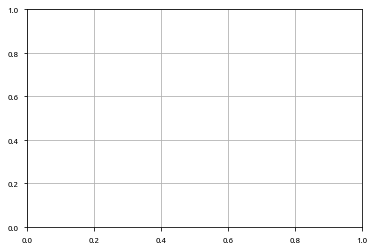

In [91]:
plt.gca().grid()

In [92]:
SPINE_COLOR = 'gray'

def format_axes(ax):
    
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)
        
    ax.grid()

    return ax

In [1]:
import pickle

with open('dump2.pkl', 'rb') as f:
    search_result = pickle.load(f)

fig, ax = plt.subplots(figsize=(16, 6))
ax = plot_convergence(search_result, ax=ax)
format_axes(ax)
plt.savefig("MAB_gifs/conv.svg", ax=ax)

/home/apoorv/Desktop/github/.env/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


ModuleNotFoundError: No module named 'sklearn.preprocessing._label'